# Preprocessing Data 

<img src="https://i.imgur.com/NpXeOWo.png" width=500 align="center">

# Read this first 

To run the code, you have to upload ```all_amazon_reviews.csv``` and ```label_1or0.csv``` first. (upload in the folder icon at the left) Download them from the GDrive folder. 

Alternatively, download this file as an .ipynb file and keep ```all_amazon_reviews.csv``` and ```label_1or0.csv``` in the same folder

### Import data and preview

In [0]:
import pandas as pd
import numpy as np
import regex as re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
reviews_df = pd.read_csv('all_amazon_reviews.csv')
reviews_df.head()

,ID,author,title,date,content,rating,helpful,image-src
0,1584088354-7052,Leanna,"I can't compare this to the original series, b...","Reviewed in the United States on August 1, 2016",I gave this book four stars because I did legi...,4.0 out of 5 stars,NaN,NaN
1,1584088318-6882,C. Springer,"Great, Smooth Read. Genuinely Entertaining.","Reviewed in the United States on August 5, 2016","I don't understand these 1-2 star ratings, I r...",4.0 out of 5 stars,NaN,NaN
2,1584087997-5444,Kindle Customer,Very good story,"Reviewed in the United States on January 15, 2017",I think I would have enjoyed this more as a no...,4.0 out of 5 stars,NaN,NaN
3,1584088309-6840,Corei,Nostalgia feels,"Reviewed in the United States on August 6, 2016","If you liked the harry potter series, you will...",4.0 out of 5 stars,NaN,NaN
4,1584088293-6773,Amazon Customer,It wasn't as good as Rowling's novels,"Reviewed in the United States on August 9, 2016","It wasn't as good as Rowling's novels, and the...",4.0 out of 5 stars,NaN,NaN


# Cleaning other columns 

In [0]:
string_to_number_rating = {'1.0 out of 5 stars' : 1,
                           '2.0 out of 5 stars' : 2,
                           '3.0 out of 5 stars' : 3,
                           '4.0 out of 5 stars' : 4,
                           '5.0 out of 5 stars' : 5}
# Convert to int for rating
reviews_df['rating'] = reviews_df['rating'].map(string_to_number_rating)
reviews_df['rating'].fillna(0, inplace=True)
reviews_df['rating'] = reviews_df['rating'].apply(lambda x: round(x))

# Convert to int for helpful
reviews_df['helpful'].replace(['One person found this helpful'], 1, inplace=True)
reviews_df['helpful'].replace("\D+", "", regex=True, inplace=True)
reviews_df['helpful'].replace(np.nan, 0, inplace=True)
reviews_df['helpful'].astype(int)


# Convert to date format for date variable
reviews_df['date'] = reviews_df['date'].str.replace('Reviewed in the United States on ', "")
reviews_df['date'] = reviews_df['date'].str.replace(',', "")
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

reviews_df.head()

,ID,author,title,date,content,rating,helpful,image-src
0,1584088354-7052,Leanna,"I can't compare this to the original series, b...",2016-08-01,I gave this book four stars because I did legi...,4,0,NaN
1,1584088318-6882,C. Springer,"Great, Smooth Read. Genuinely Entertaining.",2016-08-05,"I don't understand these 1-2 star ratings, I r...",4,0,NaN
2,1584087997-5444,Kindle Customer,Very good story,2017-01-15,I think I would have enjoyed this more as a no...,4,0,NaN
3,1584088309-6840,Corei,Nostalgia feels,2016-08-06,"If you liked the harry potter series, you will...",4,0,NaN
4,1584088293-6773,Amazon Customer,It wasn't as good as Rowling's novels,2016-08-09,"It wasn't as good as Rowling's novels, and the...",4,0,NaN


## Display Dataframe

In [0]:
reviews_df.head()

,ID,author,title,date,content,rating,helpful,image-src
0,1584088354-7052,Leanna,"I can't compare this to the original series, b...",2016-08-01,I gave this book four stars because I did legi...,4,0,NaN
1,1584088318-6882,C. Springer,"Great, Smooth Read. Genuinely Entertaining.",2016-08-05,"I don't understand these 1-2 star ratings, I r...",4,0,NaN
2,1584087997-5444,Kindle Customer,Very good story,2017-01-15,I think I would have enjoyed this more as a no...,4,0,NaN
3,1584088309-6840,Corei,Nostalgia feels,2016-08-06,"If you liked the harry potter series, you will...",4,0,NaN
4,1584088293-6773,Amazon Customer,It wasn't as good as Rowling's novels,2016-08-09,"It wasn't as good as Rowling's novels, and the...",4,0,NaN


## Display individual review 

In [0]:
pd.options.display.max_colwidth = 10000
reviews_df['content'].iloc[2]

'I think I would have enjoyed this more as a novel, but I did enjoy the story. I thought some of the stage directions would be difficult to produce, perhaps better suited to a movie. Also, I thought the characters were a little one dimensional, but a good actor could probably round them out.'

## Display individual title 

In [0]:
pd.options.display.max_colwidth = 10000
reviews_df['title'].iloc[2]

'Very good story'

# Isolate Content Variable as dataframe

In [0]:
reviews_df.dtypes

ID                   object
author               object
title                object
date         datetime64[ns]
content              object
rating                int64
helpful              object
image-src            object
dtype: object

### Drop rating == 3 

In [0]:
comment_df = reviews_df[['content','rating']]
comment_df = comment_df[comment_df.rating != 3]
comment_df['rating'].unique()

array([4, 5, 1, 2])

In [0]:
# Convert the rating to sentiment 1 or 0
def positve_negative(x):
    if(x == 4): 
      return 1
    elif(x == 5):
      return 1
    else:
      return 0

In [0]:
comment_df['sentiment'] = comment_df['rating'].apply(positve_negative)
comment_df.head()

,content,rating,sentiment
0,"I gave this book four stars because I did legitimately enjoy reading it, and I would recommend it to other Harry Potter fans (and maybe some non-fans!) to read as well. I won't compare this to the original series, because that'd be like trying to compare anything with perfection in my world. There were some things that did bother me about this book though, which I'll get to in a bit.\n\nI'll start with what I liked:\nIt has been nine years since the last Harry Potter book came out, in which I stood in line dressed as Luna Lovegood nervously avoiding everything in fear of spoilers, and as a die-hard fan I loved the excuse to return to a world I almost feel that I grew up in. I liked reading this play because I've always been eager for more Harry, and this gave me more Harry.\nI actually thought it worked well as a play, too. Plays/scripts will by virtue of their format not be able to offer as much detail and description as a book might, especially when reading a script vs seeing it as it was meant to be seen. But GIVEN that it's a play and that has to be expected, I appreciated the description that was included. There was enough in there for me to smile along with a new favorite character (Scorpius) and I definitely cried at the end, but I cry at a lot of things, so take that with a grain of salt.\n\nAnd the things I DIDN'T like are more because of that die-hard HP fan thing, but I'll give an overview anyway:\nSome of the plot points in this book just don't WORK, given the story's previous canon. I won't go into too much detail, because spoilers, but trolley witches? A certain office that seemed far too easy to get into? A kind of major relationship that seems much too far-fetched to ever be considered reality in this universe? I don't know. I just kept pausing while reading this and thinking, but, wait, THAT'S a bit contradictory.\n\nI don't know if I'll return to re-read this many times, but I have no regrets about my midnight trek to buy it among my fellow book-lovers, and I will probably still see the play if given the chance.",4,1
1,"I don't understand these 1-2 star ratings, I really don't. I thoroughly enjoyed this script book. It might not have been on par with the original Harry Potter series, but it was good in its own right. The pacing was smooth for me, even if it moved a little fast in the beginning. But this isn't a novel, it's supposed to be made into a play. Which is why I understand the pacing and not going into huge details about each year.\n\n[spoiler]Being a Slytherin myself, I love that Albus was sorted into the greatest house and made quick friends with Scorpius. He struggled with the placement, but came to realize it was were he belonged in the end.[/spoiler]\n\nI was hooked on this from the first page and finished it within the second day of owning it. I grew up with Harry Potter, but I wasn't overly excited for this script book since it isn't an actual novel. But it was a pleasant read and I'd recommend it to any fan of the series. Definitely a great insight into what our favorite characters have been up to since leaving Hogwarts. I would love to see this play!",4,1
2,"I think I would have enjoyed this more as a novel, but I did enjoy the story. I thought some of the stage directions would be difficult to produce, perhaps better suited to a movie. Also, I thought the characters were a little one dimensional, but a good actor could probably round them out.",4,1
3,"If you liked the harry potter series, you will love this book. It brings back all the feelings from the original series. However, this book will not bring new fans to the table. Its a short read and worth the money",4,1
4,"It wasn't as good as Rowling's novels, and there were a couple of points that were odd, but if you're willing to move beyond that I thought it was an excellent play. As you're reading it keep a performance in your mind and you should enjoy it a good bit.",4,1


# Manual Labelling 

In [0]:
# Shuffles the dataset and pick the first 1000 rows to use for manual labelling

# from sklearn.utils import shuffle
# comment_df = shuffle(comment_df)
# manual_label_df= comment_df['content'][:1000]
# manual_label_df = manual_label_df.to_frame()
# manual_label_df.to_csv('label_1or0.csv')

In [0]:
# load labelled data
labelled_df = pd.read_csv('label_1or0.csv')

In [0]:
judge_1 = labelled_df['Judge_1'].to_numpy()
judge_2 = labelled_df['Judge_2'].to_numpy()

from sklearn.metrics import cohen_kappa_score
kappa_boi = cohen_kappa_score(judge_1, judge_2)
print("The cohen's kappa score between 2 raters is {}".format(kappa_boi))

The cohen's kappa score between 2 raters is 0.9164047348358189


In [0]:
labelled_df.head()

,Column1,content,Judge_1,Judge_2,Judge_3
0,3358,"To be honest, it was difficult at first. Don’t read it directly after the series. Give yourself time to curate your journey. It is, of course brilliant. Keep going. Give yourself time. Understand it’s called the “cursed child” for a reason. Now you may proceed. Enjoy the journey.",1,1,1
1,1140,"The play reads quite well - a reminder of just how dialogue driven Ms. Rowling's novels are. I enjoyed this thoroughly! There are surprising alliances, some equally surprising redemptions, and a few nostalgic and harrowing elements as well. Reading this makes me wish that I could afford a trip overseas to see it onstage!",1,1,1
2,2321,Enjoyed but not her best work,0,1,0
3,3665,"It was really good to be back at Potter's world, however it also felt a bit strange and unfamiliar. I cant make up my mind weather I loved it or not. I wish it was a novel though.",0,1,0
4,1947,Major plot holes and contradictions to original books,0,0,0


In [0]:
new_df = labelled_df[['Judge_1', 'Judge_2', 'Judge_3']]
new_df.head()

,Judge_1,Judge_2,Judge_3
0,1,1,1
1,1,1,1
2,0,1,0
3,0,1,0
4,0,0,0


# Fleiss Kappa

### Calculate inter-rater agreement between 3 raters 

In [0]:
from nltk import agreement
Judge_1 = labelled_df['Judge_1'].to_numpy()
Judge_2 = labelled_df['Judge_2'].to_numpy()
Judge_3 = labelled_df['Judge_3'].to_numpy()

taskdata=[[0,str(i),str(Judge_1[i])] for i in range(0,len(Judge_1))]+[[1,str(i),str(Judge_2[i])] for i in range(0,len(Judge_2))]+[[2,str(i),str(Judge_3[i])] for i in range(0,len(Judge_3))]
ratingtask = agreement.AnnotationTask(data=taskdata)
print("The fleiss'kappa score between 3 raters is " + str(ratingtask.multi_kappa()))

The fleiss'kappa score between 3 raters is 0.9346946488517371


## General Cleaning 

The below converts each comment to 
1. Only alphanumeric characters
2. Entirely lowercase
3. Without trailing or leading spaces
4. No empty strings 

In [0]:
import re

def general_cleaning(x):
    x = str(x)
    pattern = '[^a-zA-Z0-9\ ]'
    x = re.sub(pattern,'',x)
    x = x.lower()
    x = x.strip()
    return x

In [0]:
comment_df = comment_df[comment_df['content'] != '']
comment_df['content'] = comment_df['content'].apply(general_cleaning)
comment_df.dtypes

content      object
rating        int64
sentiment     int64
dtype: object

# Stemming 

In [0]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def word_pre(x):
    stemmer = PorterStemmer()
    x = word_tokenize(x)
    store = ''
    
    for i in x:
        store += stemmer.stem(i) + ' '
        
    return store

In [0]:
comment_df['content_stem'] = comment_df['content'].apply(word_pre)
# comment_df.head()

# Lemmatization 

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.stem import WordNetLemmatizer
def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

In [0]:
comment_df['content_lem'] = get_lemmatized_text(comment_df['content'])
comment_df.head()

,content,rating,sentiment,content_stem,content_lem
0,i gave this book four stars because i did legitimately enjoy reading it and i would recommend it to other harry potter fans and maybe some nonfans to read as well i wont compare this to the original series because thatd be like trying to compare anything with perfection in my world there were some things that did bother me about this book though which ill get to in a bitill start with what i likedit has been nine years since the last harry potter book came out in which i stood in line dressed as luna lovegood nervously avoiding everything in fear of spoilers and as a diehard fan i loved the excuse to return to a world i almost feel that i grew up in i liked reading this play because ive always been eager for more harry and this gave me more harryi actually thought it worked well as a play too playsscripts will by virtue of their format not be able to offer as much detail and description as a book might especially when reading a script vs seeing it as it was meant to be seen but given that its a play and that has to be expected i appreciated the description that was included there was enough in there for me to smile along with a new favorite character scorpius and i definitely cried at the end but i cry at a lot of things so take that with a grain of saltand the things i didnt like are more because of that diehard hp fan thing but ill give an overview anywaysome of the plot points in this book just dont work given the storys previous canon i wont go into too much detail because spoilers but trolley witches a certain office that seemed far too easy to get into a kind of major relationship that seems much too farfetched to ever be considered reality in this universe i dont know i just kept pausing while reading this and thinking but wait thats a bit contradictoryi dont know if ill return to reread this many times but i have no regrets about my midnight trek to buy it among my fellow booklovers and i will probably still see the play if given the chance,4,1,i gave thi book four star becaus i did legitim enjoy read it and i would recommend it to other harri potter fan and mayb some nonfan to read as well i wont compar thi to the origin seri becaus thatd be like tri to compar anyth with perfect in my world there were some thing that did bother me about thi book though which ill get to in a bitil start with what i likedit ha been nine year sinc the last harri potter book came out in which i stood in line dress as luna lovegood nervous avoid everyth in fear of spoiler and as a diehard fan i love the excus to return to a world i almost feel that i grew up in i like read thi play becaus ive alway been eager for more harri and thi gave me more harryi actual thought it work well as a play too playsscript will by virtu of their format not be abl to offer as much detail and descript as a book might especi when read a script vs see it as it wa meant to be seen but given that it a play and that ha to be expect i appreci the descript that wa includ there wa enough in there for me to smile along with a new favorit charact scorpiu and i definit cri at the end but i cri at a lot of thing so take that with a grain of saltand the thing i didnt like are more becaus of that diehard hp fan thing but ill give an overview anywaysom of the plot point in thi book just dont work given the stori previou canon i wont go into too much detail becaus spoiler but trolley witch a certain offic that seem far too easi to get into a kind of major relationship that seem much too farfetch to ever be consid realiti in thi univers i dont know i just kept paus while read thi and think but wait that a bit contradictoryi dont know if ill return to reread thi mani time but i have no regret about my midnight trek to buy it among my fellow booklov and i will probabl still see the play if given the chanc,i gave this book four star because i did legitimately enjoy reading it and i would recommend it to other harry potter fan a

# Removal of Stopwords 

In [0]:
# Get english stopwords
stop = stopwords.words('english')
additional_stopwords = ["'s","...","'ve","``","''","'m",'--',"'ll","'d"]
stop = set(stop + additional_stopwords)
def remove_stop(x):
    x = word_tokenize(x)
    store = ''
    
    for i in x:
        if i not in stop:
            store += i + ' '
            
    return store

In [0]:
comment_df['content_stem_cleaned'] = comment_df['content_stem'].apply(remove_stop)
comment_df['content_cleaned'] = comment_df['content'].apply(remove_stop)
comment_df['content_lem_cleaned'] = comment_df['content_lem'].apply(remove_stop)

In [0]:
comment_df.iloc[9:12]

,content,rating,sentiment,content_stem,content_lem,content_stem_cleaned,content_cleaned,content_lem_cleaned
9,a good read creatively written and true to characters enjoy reading this and watching it in your minds eye enjoy the rainy day,4,1,a good read creativ written and true to charact enjoy read thi and watch it in your mind eye enjoy the raini day,a good read creatively written and true to character enjoy reading this and watching it in your mind eye enjoy the rainy day,good read creativ written true charact enjoy read thi watch mind eye enjoy raini day,good read creatively written true characters enjoy reading watching minds eye enjoy rainy day,good read creatively written true character enjoy reading watching mind eye enjoy rainy day
10,the cursed child is a good steady read it wasnt long enough to suit me but then again its a play not a novel i like the characters the story was good if youre a consistent reader of the harry potter stories this is an essential part of it you will enjoy it,4,1,the curs child is a good steadi read it wasnt long enough to suit me but then again it a play not a novel i like the charact the stori wa good if your a consist reader of the harri potter stori thi is an essenti part of it you will enjoy it,the cursed child is a good steady read it wasnt long enough to suit me but then again it a play not a novel i like the character the story wa good if youre a consistent reader of the harry potter story this is an essential part of it you will enjoy it,curs child good steadi read wasnt long enough suit play novel like charact stori wa good consist reader harri potter stori thi essenti part enjoy,cursed child good steady read wasnt long enough suit play novel like characters story good youre consistent reader harry potter stories essential part enjoy,cursed child good steady read wasnt long enough suit play novel like character story wa good youre consistent reader harry potter story essential part enjoy
11,im so not giving away spoilers i hate that and im sorry if my review may not make sense its an emotional night so here it is this would have made a fantastic book it really would have people need to remember this is not a novel but a play it was fantastic and if you start this book realizing that it is not a novel but a scriptplay you will get why i gave it only 4 stars this is the bones of a novel the heart whats missing are the things that make harry potter books phenomenal the tiny and huge things we love those descriptions of things that make our imagination run wild but this script has the one ingredient that all of harrys books have the actual story the core of the book it really is fantastic to read about the world of the grown ups and to see how they cope through the children they have to see how different their children are and to see who they become the story really is only the minimalist part of any harry potter books it has magic but not whats expected not what weve been so spoiled by ms rowlings and how could it the book is the play that is in production in england i find myself without the proper words to describe this manifesto maybe because of the nostalgia i felt as i watched my childs excited face as she got the book she waited for so long for and was brought back to myself pre children waiting for my harry book and spending the night reading it the main focus of this book is children and parents and how the past affects the future the author nailed it i so wish i could give it a five star ratings but the thing troubling me is that this totally could have been a novel beloved by everyone because the story was perfect it needed the extras the wild magical beings describe like they have been in the past by jk rowling so it leaves me totally wondering why it wasnt a novel over all it truly was wonderful if you are an adult who read the books and has a child who loves the books as well then this story will effect you and make you emotional it is a fantastic read and i hope that the

# Word Count 

In [0]:
wordcount = comment_df['content'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus.".format(wordcount))

wordcount = comment_df['content_stem'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after stemming.".format(wordcount))

wordcount = comment_df['content_lem'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after lemmatization.".format(wordcount))

wordcount = comment_df['content_lem_cleaned'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after lemmatization and removal of stopwords.".format(wordcount))

wordcount = comment_df['content_cleaned'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after removal of stopwords.".format(wordcount))

wordcount = comment_df['content_stem_cleaned'].apply(lambda x: len(x.split())).sum()
print("There are {} words in the corpus after stemming and removal of stopwords.".format(wordcount))

There are 533637 words in the corpus.
There are 533802 words in the corpus after stemming.
There are 533637 words in the corpus after lemmatization.
There are 277840 words in the corpus after lemmatization and removal of stopwords.
There are 268819 words in the corpus after removal of stopwords.
There are 293184 words in the corpus after stemming and removal of stopwords.


# No. of Unique Words

In [0]:
comment_df.content.str.split(expand=True).stack().value_counts()

.             28565
,             18050
i             16436
a             15353
to            14010
              ...  
3/4.....it        1
700+              1
8/2               1
vg                1
up-               1
Length: 2184, dtype: int64

<img src="https://i.imgur.com/caAY2Wa.png" width=500 align="center">

# Naive Bayes Classification

In [0]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_lem_cleaned']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_lem']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_stem_cleaned']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_stem']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

x_train, x_test, y_train, y_test = train_test_split(comment_df[['content']], 
                                                    comment_df['sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=0)

# x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_cleaned']], 
#                                                     comment_df['sentiment'], 
#                                                     test_size=0.2, 
#                                                     random_state=0)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
comment_matrix = vectorizer.fit_transform(x_train['content'])

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(use_idf=True, sublinear_tf=True)
# comment_matrix = vectorizer.fit_transform(x_train['content'])

from sklearn.naive_bayes import MultinomialNB
comment_classifier = MultinomialNB().fit(comment_matrix, y_train)

from sklearn import metrics
test_vector = vectorizer.transform(x_test['content'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)

confuse

array([[ 514,  126],
       [  50, 1015]])

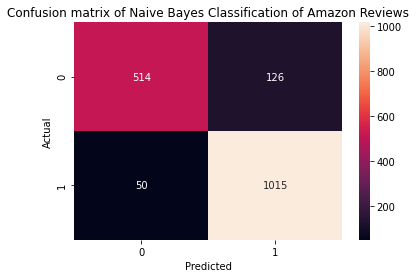

In [0]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix of Naive Bayes Classification of Amazon Reviews")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [0]:
# count vectorizing with unigram + bigram
F1_score = metrics.f1_score(y_test, result)
average_precision = metrics.average_precision_score(y_test, result)
precision_score= metrics.precision_score(y_test, result)
recall_score = metrics.recall_score(y_test, result)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Average precision-recall score: {0:0.3f}'.format(
      average_precision))

F1 score: 0.920
Precision score: 0.890
Recall score: 0.953
Average precision-recall score: 0.877


Naive Bayes Model Testing Results

<table>
  <tr>
    <th>Vectorizer</th>
    <th>Preprocessing</th>
    <th>F1 Score</th>
    <th>Precision</th>
    <th>Recall </th>
    <th>Average precision-recall score</th>
    <th>% change in F1 score from base vectorizer</th>
  </tr>
  <tr>
    <td>Count</td>
    <td>None</td>
    <td>0.915</td>
    <td>0.880</td>
    <td>0.953</td>
    <td>0.867</td>
    <td>Base</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Stemming </td>
    <td>0.908</td>
    <td>0.871</td>
    <td>0.949</td>
    <td>0.858</td>
    <td>-0.7</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Lemmatization</td>
    <td>0.910</td>
    <td>0.872</td>
    <td>0.952</td>
    <td>0.860</td>
    <td>-0.5</td>
  </tr>
  <tr>
    <td>Count </td>
    <td>Stopwords </td>
    <td>0.912</td>
    <td>0.873</td>
    <td>0.953</td>
    <td>0.861</td>
    <td>-0.3</td>
  </tr>
  <tr>
    <td>Count </td>
    <td>Stemming + Stopwords</td>
    <td>0.902</td>
    <td>0.863</td>
    <td>0.945</td>
    <td>0.850</td>
    <td>-1.3</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Bigram</td>
    <td>0.912</td>
    <td>0.872</td>
    <td>0.957</td>
    <td>0.861</td>
    <td>-0.3</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Unigram + Bigram</td>
    <td>0.920</td>
    <td>0.890</td>
    <td>0.953</td>
    <td>0.877</td>
    <td>+0.5</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Unigram + Bigram + Trigram</td>
    <td>0.918</td>
    <td>0.888</td>
    <td>0.950</td>
    <td>0.875</td>
    <td>+0.3</td>
  </tr>
  <tr>
    <td>Count</td>
    <td>Bigram + Trigram</td>
    <td>0.915</td>
    <td>0.874</td>
    <td>0.960</td>
    <td>0.864</td>
    <td>0</td>
  </tr>
  <tr>
    <td>TF-IDF</td>
    <td>None</td>
    <td>0.859</td>
    <td>0.759</td>
    <td>0.990</td>
    <td>0.757</td>
    <td>Base</td>
  </tr>
  <tr>
    <td>TF-IDF </td>
    <td>Lemmatization</td>
    <td>0.858</td>
    <td>0.758</td>
    <td>0.990</td>
    <td>0.756</td>
    <td>-0.1</td>
  </tr>
  <tr>
    <td>TF-IDF</td>
    <td>Unigram + Bigram</td>
    <td>0.839</td>
    <td>0.726</td>
    <td>0.995</td>
    <td>0.725</td>
    <td>-2</td>
  </tr>
  <tr>
    <td>TF-IDF</td>
    <td>Lemmatization + Stopwords</td>
    <td>0.877</td>
    <td>0.791</td>
    <td>0.986</td>
    <td>0.788</td>
    <td>+1.8</td>
  </tr>
  <tr>
    <td>TF-IDF </td>
    <td>Lemmatization + Stopwords +<br>sublinear tf scaling </td>
    <td>0.880</td>
    <td>0.794</td>
    <td>0.986</td>
    <td>0.792</td>
    <td>+2.1</td>
  </tr>
</table>

In [0]:
from sklearn.model_selection import cross_val_score
import time

for score in ["f1", "precision", "recall"]:
        print (score),
        print (cross_val_score(comment_classifier, test_vector, y_test,scoring=score, cv=5).mean())

f1
0.8632803539937246
precision
0.9013254373152092
recall
0.8300469483568076


# KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://medium.com/datadriveninvestor/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

metrics = ['euclidean', 'manhattan', 'cosine']
neighbors = list(range(1,30))
leaf_size = list(range(1,50))
weight = ['uniform', 'distance']
param_grid = {'metric' : metrics, 'n_neighbors': neighbors, 'weights' : weight, 'leaf_size' : leaf_size}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

{'leaf_size': 1, 'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn_model = KNeighborsClassifier(n_neighbors=9, metric='cosine', leaf_size=1, weights='distance')
knn_model.fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['content'])
result = knn_model.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)
confuse

array([[429, 211],
       [180, 885]])

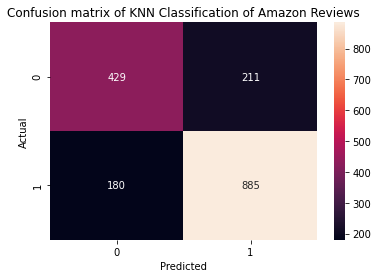

In [0]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix of KNN Classification of Amazon Reviews")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [0]:
# count vectorizing with unigram + bigram 
F1_score = metrics.f1_score(y_test, result)
average_precision = metrics.average_precision_score(y_test, result)
precision_score= metrics.precision_score(y_test, result)
recall_score = metrics.recall_score(y_test, result)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Average precision-recall score: {0:0.3f}'.format(average_precision))

F1 score: 0.819
Precision score: 0.807
Recall score: 0.831
Average precision-recall score: 0.777


In [0]:
for score in ["f1", "precision", "recall"]:
        print (score),
        print (cross_val_score(knn_model, test_vector, y_test,scoring=score, cv=5).mean())

f1
0.753623470043235
precision
0.8127791162941744
recall
0.7051643192488263


# Support Vector Machines Classification

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
nfolds=3

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.05, 0.1, 0.15, 0.20, 0.25]
degrees = [0, 1, 2, 3, 4, 5, 6]
kernels = ['rbf', 'linear', 'poly']
param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees, 'kernel' : kernels}

grid_search = GridSearchCV(svm.SVC(), param_grid, cv = nfolds)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.2, 'kernel': 'poly'}

In [0]:
from sklearn import svm

# SVM = svm.SVC(C=10, kernel='rbf', gamma=0.01).fit(comment_matrix, y_train)

# test_vector = vectorizer.transform(x_test['content'])
# result = SVM.predict(test_vector)
# confuse = metrics.confusion_matrix(y_test, result)
# confuse 

SVM = svm.SVC(C=1, kernel='poly', gamma=0.1, degree=1).fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['content'])
result = SVM.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)
confuse

# SVM = svm.SVC(C=1, kernel='linear', gamma=0.1).fit(comment_matrix, y_train)

# test_vector = vectorizer.transform(x_test['content'])
# result = SVM.predict(test_vector)
# confuse = metrics.confusion_matrix(y_test, result)
# confuse

array([[535, 105],
       [ 70, 995]])

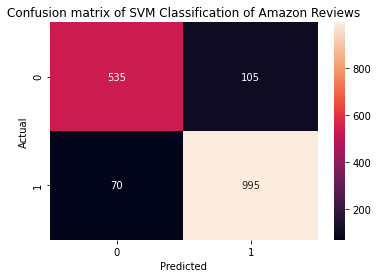

In [0]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix of SVM Classification of Amazon Reviews")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [0]:
# count vectorizing with unigram + bigram + kernel = poly
F1_score = metrics.f1_score(y_test, result)
average_precision = metrics.average_precision_score(y_test, result)
precision_score= metrics.precision_score(y_test, result)
recall_score = metrics.recall_score(y_test, result)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Average precision-recall score: {0:0.3f}'.format(
      average_precision))

F1 score: 0.919
Precision score: 0.905
Recall score: 0.934
Average precision-recall score: 0.886


In [0]:
for score in ["f1", "precision", "recall"]:
        print (score),
        print (cross_val_score(SVM, test_vector, y_test,scoring=score, cv=5).mean())

f1
0.8733235916847507
precision
0.8489090809135968
recall
0.8995305164319249


# Decision Tree Classification

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier() 

param_grid = { 
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_features': ['auto','sqrt','log2']
}

grid_search = GridSearchCV(clf, param_grid, cv= 5)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

clf=DecisionTreeClassifier(criterion='entropy',splitter='random',max_features='sqrt')

comment_classifier = clf.fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['content'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)
confuse

array([[407, 233],
       [193, 872]])

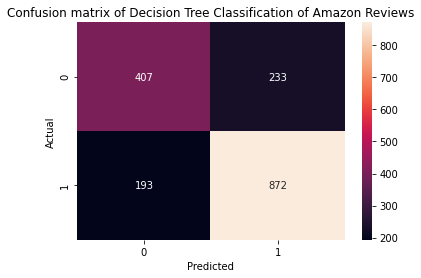

In [0]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix of Decision Tree Classification of Amazon Reviews")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [0]:
F1_score = metrics.f1_score(y_test, result)
average_precision = metrics.average_precision_score(y_test, result)
precision_score= metrics.precision_score(y_test, result)
recall_score = metrics.recall_score(y_test, result)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Average precision-recall score: {0:0.3f}'.format(
      average_precision))

F1 score: 0.804
Precision score: 0.789
Recall score: 0.819
Average precision-recall score: 0.759


In [0]:
for score in ["f1", "precision", "recall"]:
        print (score),
        print (cross_val_score(comment_classifier, test_vector, y_test,scoring=score, cv=5).mean())

f1
0.7855794053147702
precision
0.7604195877759192
recall
0.7971830985915493


# Summary of Classification Results 

<table>
  <tr>
    <th>Method</th>
    <th>F1 Score</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>CV Folds</th>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td>0.863</td>
    <td>0.901</td>
    <td>0.830</td>
    <td>5</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>0.754</td>
    <td>0.813</td>
    <td>0.705</td>
    <td>5</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>0.873</td>
    <td>0.849</td>
    <td>0.899</td>
    <td>5</td>
  </tr>
    <tr>
    <td>Decision Tree</td>
    <td>0.799</td>
    <td>0.766</td>
    <td>0.814</td>
    <td>5</td>
  </tr>
</table>

# Average Review Length

In [0]:
wordcount = comment_df['content'].apply(lambda x: len(x.split())).sum()

wordlength = wordcount / comment_df.shape[0]
print ("The average no. of words in a review is %.2f" % wordlength)


The average no. of words in a review is 62.62


# Records Classified Per Second 

In [0]:
# Records classified
 comment_df.shape[0] * 0.2

1704.4

In [0]:
# Time taken for NB
timeit comment_classifier.predict(test_vector)

100 loops, best of 3: 2.56 ms per loop


In [0]:
# Time taken for SVM
timeit SVM.predict(test_vector)

1 loop, best of 3: 2.08 s per loop


In [0]:
# Records classified per second for SVM
1704/1.99

856.2814070351759

In [0]:
# Records classified per second for NB
1704/0.00244

698360.655737705

In [0]:
# Time to train model for SVM
timeit svm.SVC(C=1, kernel='poly', gamma=0.2, degree=1).fit(comment_matrix, y_train)

1 loop, best of 3: 10.2 s per loop


In [0]:
# Time to train model for NB 
timeit MultinomialNB().fit(comment_matrix, y_train)

100 loops, best of 3: 16.4 ms per loop


<table>
  <tr>
    <th>Method</th>
    <th>Records classified per second</th>
    <th>Time to train Model</th>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td>856.281</td>
    <td>10.7 seconds</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>856281.407</td>
    <td>0.0178 seconds<br></td>
  </tr>
</table>

# Time Optimization with SVM

In [0]:
x_train, x_test, y_train, y_test = train_test_split(comment_df[['content_cleaned']], 
                                                    comment_df['sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=0)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
comment_matrix = vectorizer.fit_transform(x_train['content_cleaned'])

In [0]:
SVM = svm.SVC(C=1, kernel='poly', gamma=0.1, degree=1).fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['content_cleaned'])
result = SVM.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)
confuse

array([[496, 144],
       [ 70, 995]])

In [0]:
# Time taken for classification for SVM
timeit SVM.predict(test_vector)

1 loop, best of 3: 1.27 s per loop


In [0]:
# Records classified per second 
1704/1.28

1331.25

In [0]:
# Time to train model for SVM
timeit svm.SVC(C=1, kernel='poly', gamma=0.2, degree=1).fit(comment_matrix, y_train)

1 loop, best of 3: 6.28 s per loop


In [0]:
F1_score = metrics.f1_score(y_test, result)
average_precision = metrics.average_precision_score(y_test, result)
precision_score= metrics.precision_score(y_test, result)
recall_score = metrics.recall_score(y_test, result)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Average precision-recall score: {0:0.3f}'.format(
      average_precision))

F1 score: 0.903
Precision score: 0.874
Recall score: 0.934
Average precision-recall score: 0.857


In [0]:
for score in ["f1", "precision", "recall"]:
        print (score),
        print (cross_val_score(SVM, test_vector, y_test,scoring=score, cv=5).mean())

f1
0.8731407156410143
precision
0.8227341236932345
recall
0.9305164319248826


<table>
  <tr>
    <th>Method</th>
    <th>Records classified per second</th>
    <th>% increase in records classified</th>
    <th>Time to train Model</th>
    <th>% decrease in training time</th>
    <th>F1 Score</th>
    <th>Precision</th>
    <th>Recall</th>
  </tr>
  <tr>
    <td>SVM</td>
    <td>856.281</td>
    <td>Base</td>
    <td>10.7 seconds</td>
    <td>Base</td>
    <td>0.8733</td>
    <td>0.8489</td>
    <td>0.8995</td>
  </tr>
  <tr>
    <td>SVM + stopwords<br>removal</td>
    <td>1331.25</td>
    <td>55.4%</td>
    <td>6.5 seconds <br></td>
    <td>39.2%</td>
    <td>0.8731</td>
    <td>0.8227</td>
    <td>0.9305</td>
  </tr>
</table>

# Visualizing Text Data

In [0]:
positive_df = comment_df[comment_df['sentiment'] == 1]
critical_df = comment_df[comment_df['sentiment'] == 0]

In [0]:
print(positive_df.sentiment.unique())
print(critical_df.sentiment.unique())

[1]
[0]


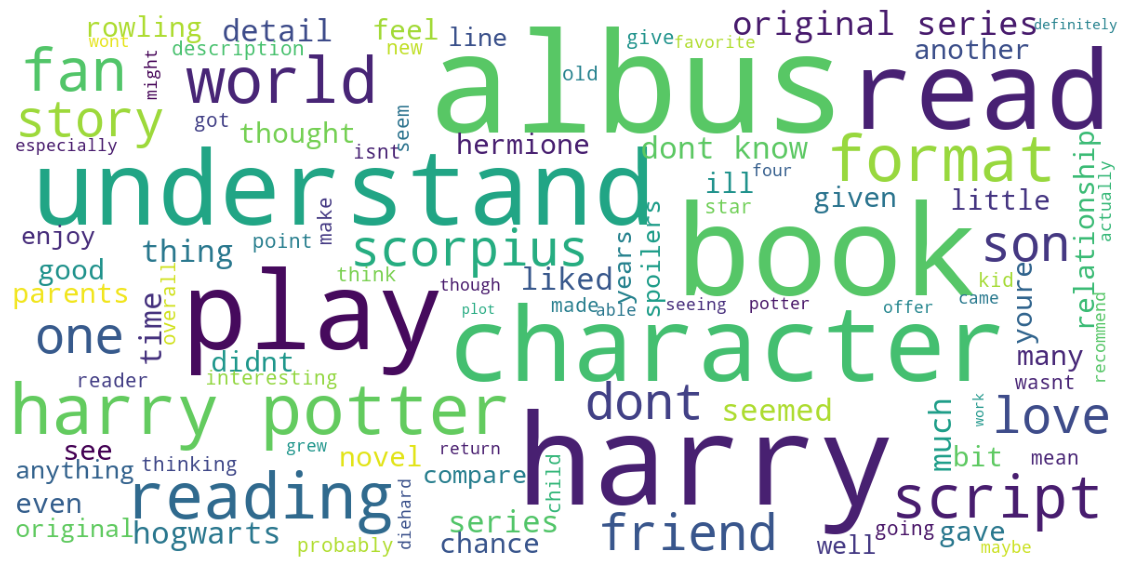

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 50, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(positive_df["content_cleaned"])

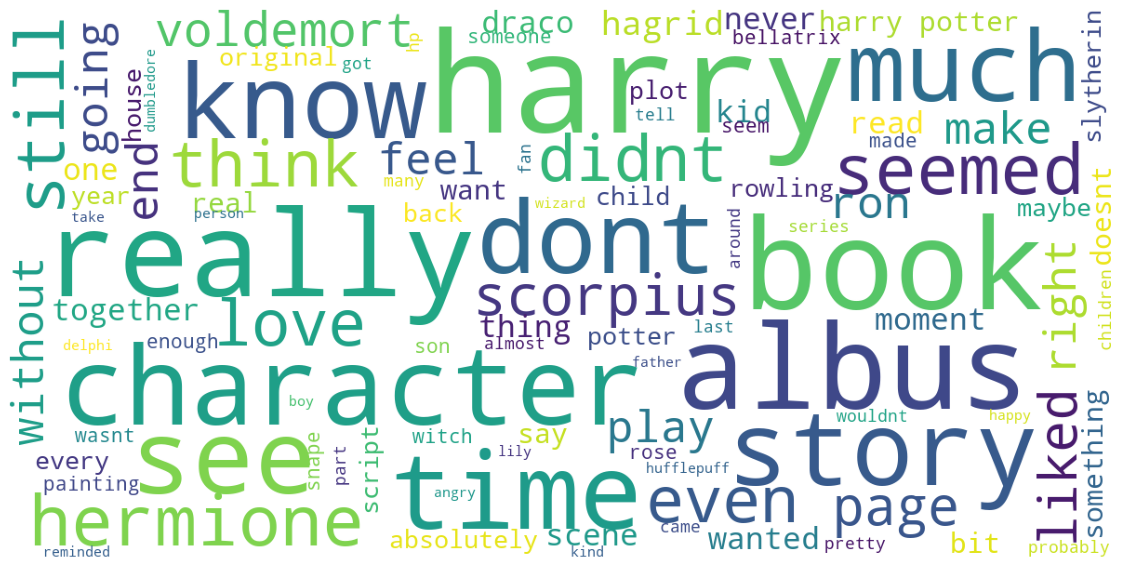

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 50, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(critical_df["content_cleaned"])

# Enhanced Classification

### Random Forest Ensemble Classification



In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [100, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(clf, param_grid, cv= 5)
grid_search.fit(test_vector, y_test)
grid_search.best_params_

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

clf=RandomForestClassifier(bootstrap=False,max_features='sqrt',n_estimators=800)

comment_classifier = clf.fit(comment_matrix, y_train)

test_vector = vectorizer.transform(x_test['content_cleaned'])
result = comment_classifier.predict(test_vector)
confuse = metrics.confusion_matrix(y_test, result)
confuse

array([[476, 164],
       [ 67, 998]])

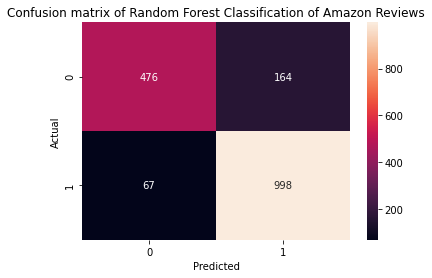

In [0]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix of Random Forest Classification of Amazon Reviews")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [0]:
F1_score = metrics.f1_score(y_test, result)
average_precision = metrics.average_precision_score(y_test, result)
precision_score= metrics.precision_score(y_test, result)
recall_score = metrics.recall_score(y_test, result)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Average precision-recall score: {0:0.3f}'.format(
      average_precision))

F1 score: 0.896
Precision score: 0.859
Recall score: 0.937
Average precision-recall score: 0.844


In [0]:
for score in ["f1", "precision", "recall"]:
        print (score),
        print (cross_val_score(comment_classifier, test_vector, y_test,scoring=score, cv=5).mean())

f1
0.86379204106785
precision
0.8294134983360699
recall
0.8985915492957746


# List of wrongly classified reviews

In [0]:
enhanced_df = pd.concat([x_test,y_test], axis=1)
enhanced_df['predicted'] = result
enhanced_df.head()

,content_cleaned,sentiment,predicted
3553,dont go hoping reading experience like novel might give continuation series written completely rowlingthis different,1,1
6875,like way written book play hard read disappointed,0,0
574,went book expecting like well reviews harry potter fan knew would read eventually play format hard get used first started get groove however story line started slow kind depressing main focus albus potter seems complete opposite father resents living shadow seemed lonely depressed life positive thing best friend scorpius malfoy 14 way book starts get better boys decide help amos diggory wants use time turner bring back son albus scorpius make several attempts traveling back time trying change past attempts create terrible butterfly effects present enjoy reading snape briefly one alternate realities traveled since snape favorite character like people pointed time travel stuff kind read like fanfiction book ok sad main characters harry potter series seemed gotten old boring,1,0
3408,loved book wish th harry potter come like many others cant get enough stories,1,1
8480,im huge harry potter fan excited heard new book preordered full excitement delivered excitement left opened book read first two pages couldnt get passed format hear people able get passed format terrible story huge disappointment dog came room peed couldnt even upset,0,0


Replace - with space <br>
Replace ... with space <br>
depressing, depressed, -> negative <br> 
boooooriiing -> boring <br> 
replace ... with space <br> 
replace ...... with space <br> 
replace . with space <br> 
replace tewwible with terrible <br> 
remove links that start with https <br> 

In [0]:
pd.set_option('display.max_rows', 300)
wrong_df = enhanced_df[enhanced_df['sentiment'] != enhanced_df['predicted']]
wrong_df['length'] = wrong_df['content_cleaned'].str.len()
wrong_df.sort_values(by=['sentiment','length'], ascending=[False, True])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,content_cleaned,sentiment,predicted,length
3696,like,1,0,5
1644,dont miss,1,0,10
2682,enjoyable read,1,0,15
2983,nudity disappointing,1,0,21
839,loved theme hard read,1,0,22
2967,son wanted book found,1,0,22
1833,didnt think would like,1,0,23
5332,grandson really like book,1,0,26
2267,play didnt read smoothly prose,1,0,31
2975,bought son looks like happy book,1,0,33


# EDA

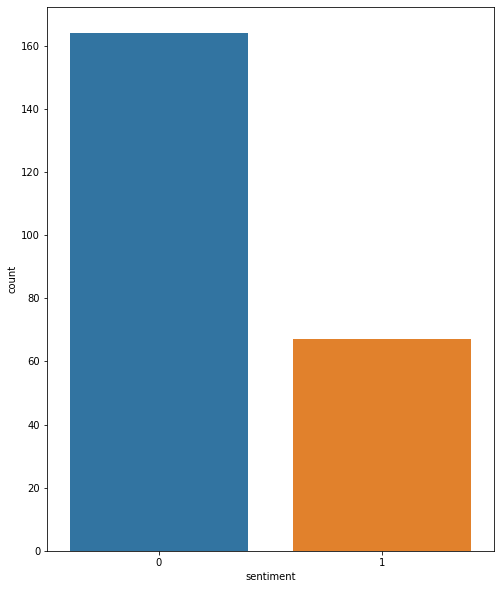

In [0]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x="sentiment", data=wrong_df);

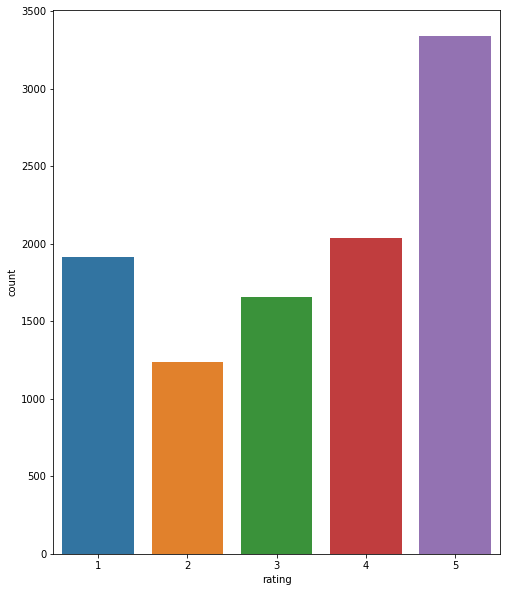

In [0]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x="rating", data=reviews_df);

List/No. of duplicated authors 

In [0]:
duplicated_rows = reviews_df[reviews_df['author'].duplicated()]
# duplicated_rows.author.unique()
len(duplicated_rows.author.unique())

355

In [0]:
top_10_df = reviews_df.groupby('author').size().reset_index(name='No. of Repeats')
top_10_df.sort_values('No. of Repeats', ascending=False).head(10)                                                          

,author,No. of Repeats
277,Amazon Customer,1062
3723,Kindle Customer,269
5843,Sarah,14
5370,Rachel,14
255,Amanda,13
185,Alex,12
518,Ashley,12
3093,Jessica,12
321,Amy,11
3580,Katie,11


List/No. of duplicated titles

In [0]:
duplicated_rows = reviews_df[reviews_df['title'].duplicated()]
# duplicated_rows.title.unique()
len(duplicated_rows.title.unique())

353

In [0]:
# Top 10 repeated titles 
top_10_df = reviews_df.groupby('title').size().reset_index(name='No. of Repeats')
top_10_df.sort_values('No. of Repeats', ascending=False).head(10)                                                          

,title,No. of Repeats
1719,Five Stars,933
1760,Four Stars,308
4818,One Star,283
5906,Three Stars,257
5973,Two Stars,152
1255,Disappointing,67
1233,Disappointed,59
4143,Meh,30
2064,Great,29
4048,Loved it!,28


List/No. of duplicated content

In [0]:
duplicated_rows = reviews_df[reviews_df['content'].duplicated()]
# duplicated_rows.title.unique()
len(duplicated_rows.title.unique())

0

In [0]:
# Top ten 
top_10_df = reviews_df.groupby('content').size().reset_index(name='No. of Repeats')
top_10_df.sort_values('No. of Repeats', ascending=False).head(10)                                                          

,content,No. of Repeats
0,"""Action packed. Fun and fulling, it is a good read. Albus Potter was my favorite character.""",1
6786,"Not as great as the original books, but not as bad as some of the reviews on Amazon state. It was nice to be able to read about Harry's world again!",1
6779,"Not as good as the other HP books, but still very good.",1
6780,"Not as good as the other Harry Potter books, but as a play, it really couldn't be. Still, quite enjoyable, quick to read, and fun to find a continuation to a story you love.",1
6781,Not as good as the other ones.,1
6782,Not as good as the others. Did not care for play setting,1
6783,"Not as good as the series, didn't seem like it was written by the same person as who wrote the series",1
6784,Not as great as an actual J.K. Rowling book but it does have the same heart and I really enjoyed it!,1
6785,Not as great as others but not bad.,1
6787,"Not as great as the original series, but good. Don't know how much of the story and screenplay were from Rowling.",1


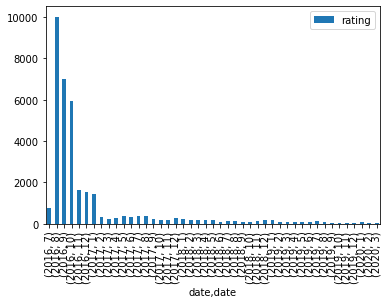

In [0]:
# Number of reviews by date
reviews_df.groupby([reviews_df["date"].dt.year, reviews_df["date"].dt.month]).sum().plot(kind="bar");